In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
df=pd.read_csv('/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [11]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [12]:
df['selling_price'].unique()

array([  60000,  135000,  600000,  250000,  450000,  140000,  550000,
        240000,  850000,  365000,  260000, 1650000,  585000, 1195000,
        390000, 1964999, 1425000,  975000, 1190000,  930000,  525000,
       1735000, 1375000,  900000, 1300000, 1400000,  229999, 1550000,
       1250000,  625000, 1050000,  560000,  290000,  275000,  411000,
        150000,  500000,  100000,  725000,  401000,  750000,  310000,
        665000,  465000,  160000,  675000,  300000,   70000,  151000,
        280000,  350000,  570000,  125000,  130000,  925000,  200000,
        248000,   80000,  650000,  495000,  371000, 1025000, 8150000,
        325000, 1470000, 2800000,  210000, 1150000, 4500000, 2750000,
       1975000,  175000, 2500000,  628000,  399000,  315000,  780000,
        434000,  690000,  555000,  120000,  165000,   95000,  800000,
        840000,  490000,  400000, 1000000,  530000,   40000,   75000,
        540000,  700000,  430000,   65000,  195000,  170000,  225000,
         99000,  620

In [13]:
df['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,   5000,  33000,  28000,  59000,   4500,
       175900,  14500,  15000,  33800, 130400,  80000,  10000, 119000,
        75800,  40000,  74000,  64000, 120000,  79000,  18500,  10200,
        29000,  90000,  73300,  92000,  66764, 350000, 230000,  31000,
        39000, 166000, 110000,  54000,  63000,  76000,  11958,  20000,
         9000,   6500,  58000,  62200,  34000,  53000,  49000,  63500,
         9800,  13000,  21000,  29173,  48000,  30000,  87000,  16000,
        79350,  81000,   3600,  14272,  49213,  57000,   3240, 114000,
        53772, 140000, 175000,  36000, 155500,  23000,  22155,  78380,
       150000,  80362,  55000,   1136,  43000,   2650, 115962,  65000,
        56000, 213000, 139000, 160000, 163000,  32000,  52000,  11240,
        66000,  26500,  72000,  44000, 130000, 195000, 155000,   4000,
        41000,  10832,  14681,  51000, 200000,  19600,  46730,  21170,
      

In [14]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [15]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [16]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='count'>

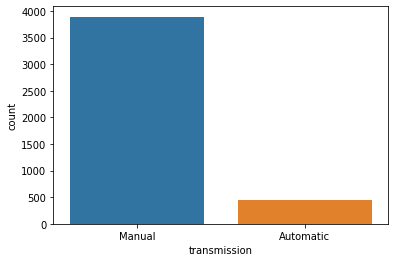

In [20]:
sns.countplot('transmission',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel', ylabel='count'>

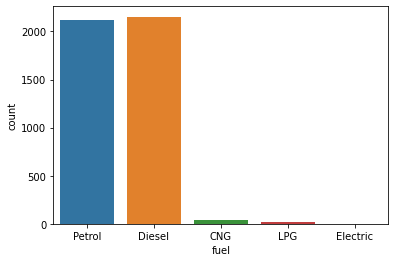

In [21]:
sns.countplot('fuel',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='owner', ylabel='count'>

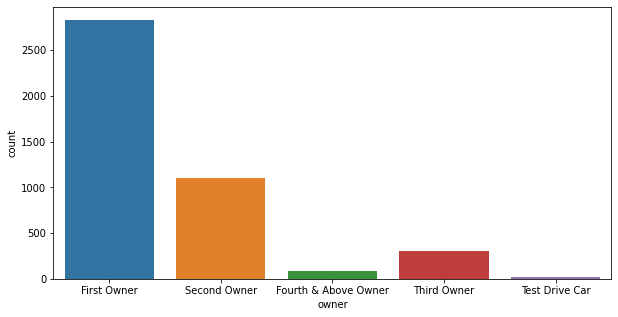

In [22]:
plt.figure(figsize=(10,5))
sns.countplot('owner',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year'>

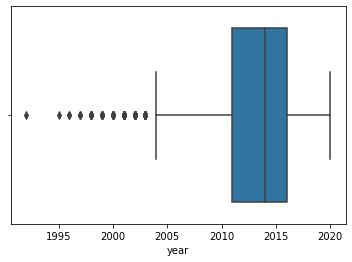

In [23]:
sns.boxplot('year',data=df)

In [24]:
df1=df[df['year']<2005]

In [25]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
123,Maruti Zen LX,2004,95000,50000,Petrol,Individual,Manual,First Owner
137,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner
141,Hyundai Santro LP zipPlus,2003,75000,57000,Petrol,Individual,Manual,First Owner
149,Hyundai Santro LE,2002,65000,70000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
4153,Skoda Octavia Ambiente 1.9 TDI MT,2002,90000,116000,Diesel,Individual,Manual,Second Owner
4208,Toyota Qualis FS B3,2001,150000,256000,Diesel,Dealer,Manual,First Owner
4232,Hyundai Santro Xing XG AT,2004,125000,70000,Petrol,Individual,Automatic,Second Owner
4290,Maruti 800 Std,2004,37500,90000,Petrol,Individual,Manual,Second Owner


<AxesSubplot:xlabel='year', ylabel='selling_price'>

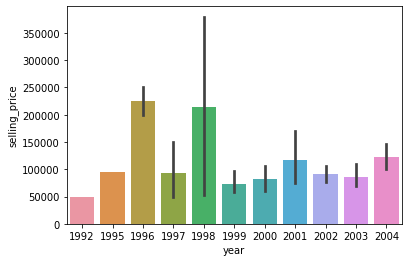

In [26]:
sns.barplot(data=df1,x='year',y='selling_price')

In [27]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
123,Maruti Zen LX,2004,95000,50000,Petrol,Individual,Manual,First Owner
137,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner
141,Hyundai Santro LP zipPlus,2003,75000,57000,Petrol,Individual,Manual,First Owner
149,Hyundai Santro LE,2002,65000,70000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
4153,Skoda Octavia Ambiente 1.9 TDI MT,2002,90000,116000,Diesel,Individual,Manual,Second Owner
4208,Toyota Qualis FS B3,2001,150000,256000,Diesel,Dealer,Manual,First Owner
4232,Hyundai Santro Xing XG AT,2004,125000,70000,Petrol,Individual,Automatic,Second Owner
4290,Maruti 800 Std,2004,37500,90000,Petrol,Individual,Manual,Second Owner


<AxesSubplot:xlabel='year', ylabel='selling_price'>

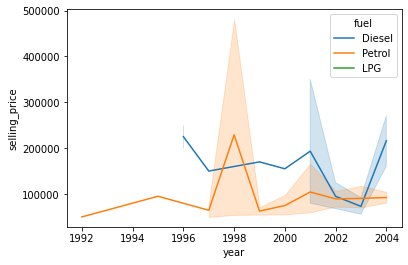

In [28]:
sns.lineplot(data=df1,x='year',y='selling_price',hue='fuel')

In [29]:
# sns.lineplot(data=df2,x='year',y='selling_price',hue='fuel')

<AxesSubplot:xlabel='year', ylabel='km_driven'>

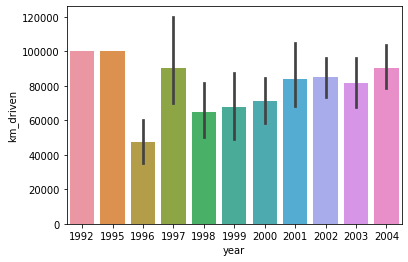

In [30]:
sns.barplot(data=df1,x='year',y='km_driven')

fuel
Diesel     28
LPG         1
Petrol    118
Name: year, dtype: int64


<AxesSubplot:xlabel='year'>

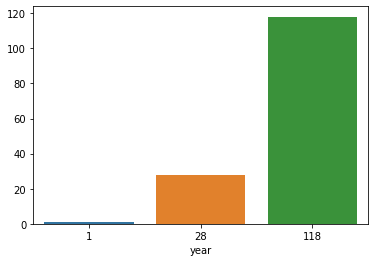

In [31]:
new_df=df1.groupby('fuel')['year'].count()
print(new_df)
sns.barplot(data=new_df,x=new_df.index,y=new_df.values)

<AxesSubplot:xlabel='year'>

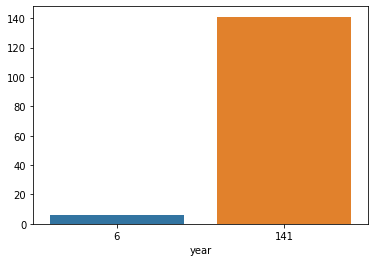

In [32]:
new_df=df1.groupby('seller_type')['year'].count()
new_df
sns.barplot(data=new_df,x=new_df.index,y=new_df.values)
# sns.countplot(data=df1,x='year',y='seller_type')

In [33]:
df2=df[df['year']>=2005]
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


<AxesSubplot:xlabel='year', ylabel='selling_price'>

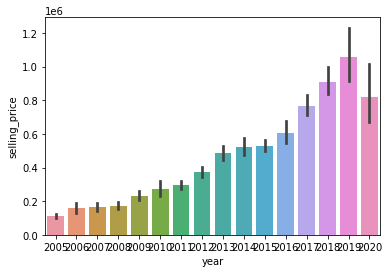

In [34]:
sns.barplot(data=df2,x='year',y='selling_price')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='selling_price'>

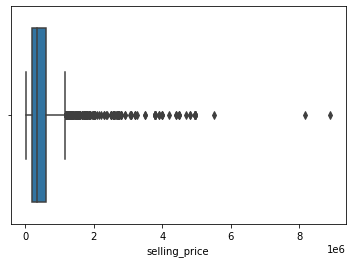

In [35]:
sns.boxplot('selling_price',data=df)

In [36]:
np.where(df['selling_price']<100000)

(array([   0,   13,   64,   82,   92,  123,  137,  141,  149,  151,  160,
         173,  175,  177,  178,  187,  221,  222,  225,  237,  259,  310,
         315,  333,  334,  340,  372,  388,  391,  392,  401,  404,  413,
         442,  446,  457,  476,  567,  586,  605,  624,  631,  641,  643,
         664,  665,  682,  684,  729,  747,  761,  767,  820,  850,  851,
         856,  877,  893,  912,  931,  949,  960,  970,  995,  998, 1025,
        1050, 1051, 1054, 1101, 1110, 1111, 1126, 1131, 1173, 1174, 1211,
        1213, 1228, 1247, 1259, 1283, 1284, 1296, 1301, 1307, 1318, 1319,
        1320, 1321, 1326, 1327, 1329, 1334, 1350, 1363, 1380, 1398, 1400,
        1404, 1433, 1446, 1450, 1466, 1468, 1503, 1572, 1590, 1592, 1597,
        1598, 1600, 1611, 1627, 1640, 1657, 1675, 1680, 1692, 1699, 1702,
        1711, 1754, 1762, 1782, 1791, 1822, 1832, 1848, 1892, 1894, 1922,
        1927, 1928, 1937, 1938, 1939, 1943, 1948, 1972, 1993, 2006, 2019,
        2028, 2045, 2047, 2054, 2055, 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven'>

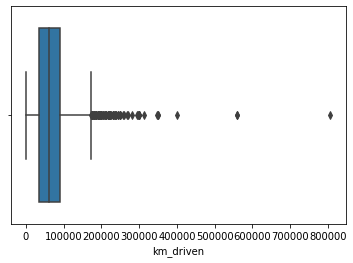

In [37]:
sns.boxplot('km_driven',data=df)

In [38]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


<AxesSubplot:xlabel='year', ylabel='selling_price'>

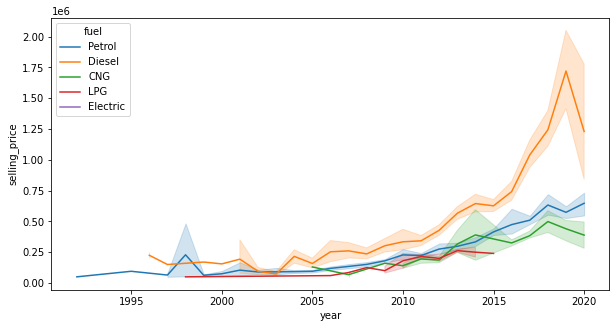

In [39]:

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='selling_price',hue='fuel')

<AxesSubplot:xlabel='year', ylabel='selling_price'>

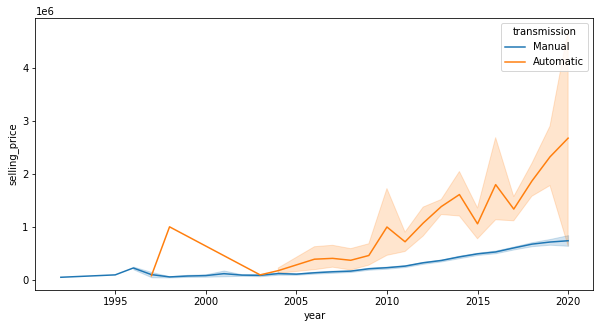

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='selling_price',hue='transmission')

<AxesSubplot:xlabel='year', ylabel='selling_price'>

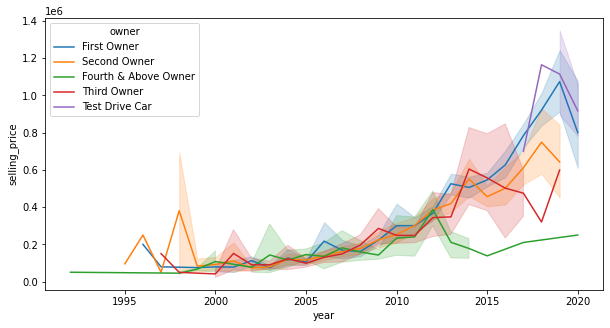

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='year',y='selling_price',hue='owner')

In [42]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


In [43]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<AxesSubplot:>

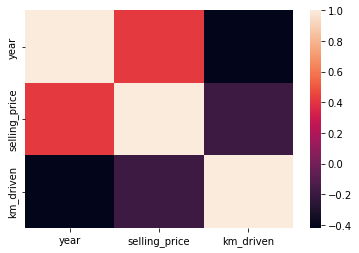

In [44]:
sns.heatmap(df.corr())